In [ ]:
# Solution
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Sytem parapeters
ω_D   = 2*np.pi
ω_ο = 1.5*ω_D
β = ω_ο/4 
γ = 0.9

# Simulation parameters
dt = 1e-3
t = np.arange(0,6,dt)
# Initial conditions
N = 6
# Matrix of different values of θ
θ_m = np.zeros([2,N])
θ_m[0,:] = np.linspace(-2.5,2.5,N)

def f(θ,t):
    dvdt = -ω_ο**2*np.sin(θ[0])-2*β*θ[1]+γ*ω_ο**2*np.cos(ω_D*t)
    dθdt = θ[1]
    return[dθdt, dvdt]


for i in range(N):
    # Select initial condition
    θ = θ_m[:,i]
    # Solve differential equation
    sol = odeint(f,θ,t)
    # Select the soalution
    θs = sol[:,0]
    # plot the results
    plt.plot(t,θs,'k')
plt.xlabel('Time t[s]')
plt.ylabel('Angle θ[rads]')
plt.savefig("solution.png", bbox_inches='tight',dpi=600)
plt.show()

In [ ]:
# Solution
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Sytem parapeters
ω_D = 2*np.pi
ω_ο = 1.5*ω_D
β = ω_ο/4 
γ = 1.503

# Simulation parameters
dt = 1e-3
t = np.arange(0,25,dt)
θ = [0,0]


def f(θ,t):
    dvdt = -ω_ο**2*np.sin(θ[0])-2*β*θ[1]+γ*ω_ο**2*np.cos(ω_D*t)
    dθdt = θ[1]
    return[dθdt, dvdt]


# Solve differential equation
sol = odeint(f,θ,t)
# Select the solution
θs1 = sol[:,0]

# Solve differential equation fo the new initial condition
θ = [0.001,0]
sol = odeint(f,θ,t)
# Select the solution
θs2 = sol[:,0]

# plot the results
plt.plot(t,θs1,'k')
plt.plot(t,θs2,'k--')
plt.xlabel('Time t[s]')
plt.ylabel('Angle θ[rads]')
plt.savefig("diverge.png", bbox_inches='tight',dpi=600)
plt.legend(['θ(0)=0','θ(0)=0.001'])
plt.show()

In [ ]:
# Biffurcation
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
# Sytem parapeters
ω_D   = 2*np.pi
ω_ο = 1.5*ω_D
β = ω_ο/4 

# Simulation parameters
dt = 1e-4
t = np.arange(0,500,dt)
# Initial conditions
θ = [-np.pi/2,0]

def f(θ,t):
    dvdt = -ω_ο**2*np.sin(θ[0])-2*β*θ[1]+γ*ω_ο**2*np.cos(ω_D*t)
    dθdt = θ[1]
    return[dθdt, dvdt]

# Select γ for small values and for big ones    
#γ_m = np.arange(1.03,1.09,1e-5)
γ_m = np.arange(1.03,2.15,1e-5)
bif = np.zeros([len(γ_m),100])
for j in range(len(γ_m)):
    γ = γ_m[j]
    sol = odeint(f,θ,t)
    bif[j,:] = sol[int(400/dt):int(500/dt):int(1/dt),1]

np.savetxt('test.out',bif,delimiter=',')

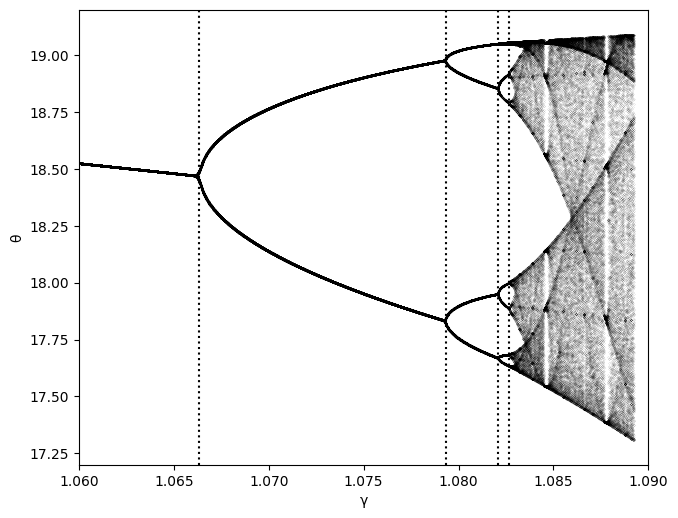

In [85]:
import numpy as np
import matplotlib.pyplot as plt

γ_m = np.arange(1.03,1.09,1e-5)
bif = np.loadtxt('test.out',delimiter=',')

plt.plot(γ_m,bif,'k.',markersize=.1)
plt.axvline(x = 1.06631, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.07935, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.08207, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.08268, color = 'k', ls=':', label = 'axvline - full height')

plt.axis([1.06,1.09,17.2,19.2])
plt.tight_layout(pad=0.05)
plt.xlabel('γ')
plt.ylabel('θ')
plt.savefig("biff1.png", bbox_inches='tight',dpi=600)
plt.show()

In [68]:
N=len(γ_m)
matrix = np.zeros(N)
for i in range(N):
    matrix[i]=len(np.unique(bif[i,:].round(decimals=1)))

for i in range(N-1):
    if matrix[i]!=matrix[i+1]:
        print(γ_m[i],matrix[i+1])

1.066310000000238 2.0
1.0793500000003233 3.0
1.0795100000003244 4.0
1.082050000000341 5.0
1.0820700000003411 6.0
1.0823000000003427 7.0
1.0826800000003451 8.0
1.0828800000003465 9.0
1.0830600000003476 10.0
1.0830800000003478 9.0
1.0830900000003478 10.0
1.0831900000003485 9.0
1.0832400000003488 10.0
1.0833900000003498 11.0
1.0834000000003499 9.0
1.08341000000035 11.0
1.0836300000003514 9.0
1.0836400000003514 11.0
1.0836700000003516 10.0
1.0836800000003517 11.0
1.083870000000353 8.0
1.0839000000003531 9.0
1.0839100000003532 11.0
1.0839400000003534 10.0
1.0839500000003535 12.0
1.0840800000003543 11.0
1.0840900000003544 12.0
1.0841100000003545 10.0
1.0841200000003546 12.0
1.0844300000003566 11.0
1.0844400000003567 12.0
1.0844500000003567 11.0
1.0844600000003568 12.0
1.0844700000003569 13.0
1.084480000000357 6.0
1.0846100000003578 7.0
1.084630000000358 8.0
1.0847100000003584 10.0
1.0847200000003585 15.0
1.0847400000003586 13.0
1.0847500000003587 15.0
1.084810000000359 13.0
1.084820000000359

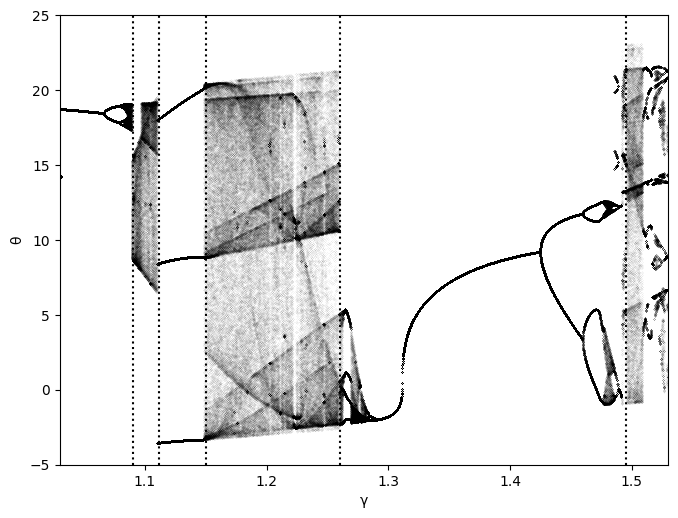

In [36]:
import numpy as np
import matplotlib.pyplot as plt

γ = np.arange(1,2.5,0.0001)
bif = np.loadtxt('test.out',delimiter=',')

plt.plot(γ,bif,'k.',markersize=0.05)
plt.axvline(x = 1.09, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.112, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.15, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.26, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.495, color = 'k', ls=':', label = 'axvline - full height')
plt.axis([1.03,1.53,-5,25])
plt.tight_layout(pad=0.05)
plt.xlabel('γ')
plt.ylabel('θ')
plt.savefig("bif1.png", bbox_inches='tight',dpi=600)
plt.show()

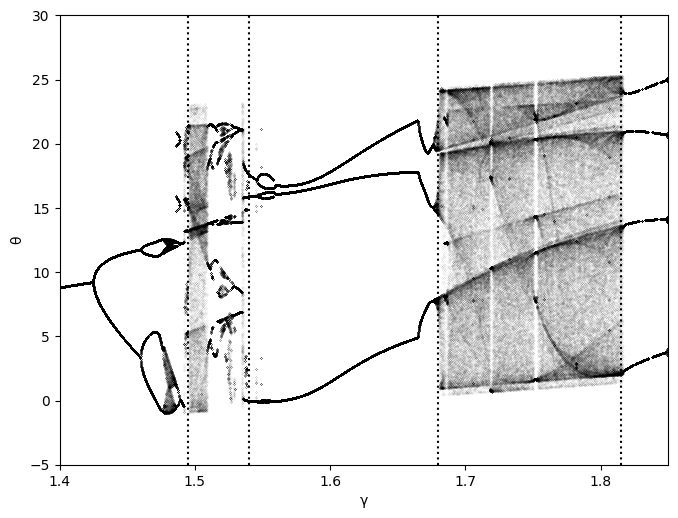

In [26]:
import numpy as np
import matplotlib.pyplot as plt

γ = np.arange(1,2.5,0.0001)
bif = np.loadtxt('test.out',delimiter=',')

plt.plot(γ,bif,'k.',markersize=0.05)

plt.axis([1.4,1.85,-5,30])
plt.axvline(x = 1.495, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.54, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.68, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.815, color = 'k', ls=':', label = 'axvline - full height')

plt.tight_layout(pad=0.05)
plt.xlabel('γ')
plt.ylabel('θ')
plt.savefig("bif2.png", bbox_inches='tight',dpi=600)
plt.show()

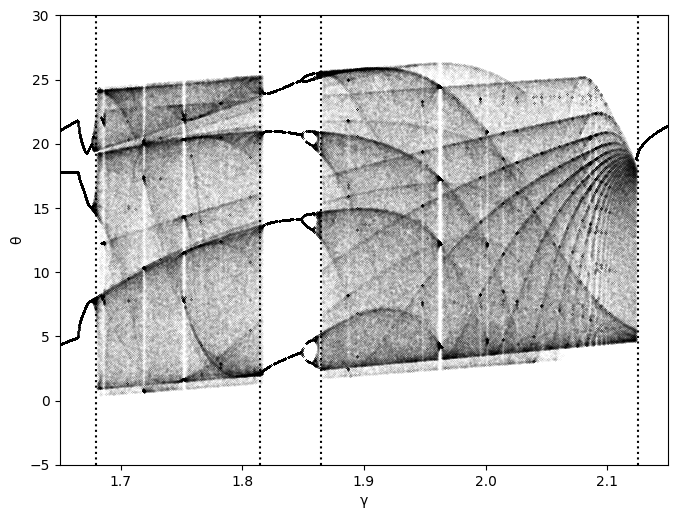

In [37]:
import numpy as np
import matplotlib.pyplot as plt

γ = np.arange(1,2.5,0.0001)
bif = np.loadtxt('test.out',delimiter=',')

plt.plot(γ,bif,'k.',markersize=0.05)
plt.axvline(x = 1.68, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.815, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 1.865, color = 'k', ls=':', label = 'axvline - full height')
plt.axvline(x = 2.125, color = 'k', ls=':', label = 'axvline - full height')

plt.axis([1.65,2.15,-5,30])
plt.tight_layout(pad=0.05)
plt.xlabel('γ')
plt.ylabel('θ')
plt.savefig("bif3.png", bbox_inches='tight',dpi=600)
plt.show()